In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
area

<xarray.DataArray (gridY: 898, gridX: 398)>
array([[185243.16065032, 190803.27747661, 194671.95335081, ...,
        231244.7650926 , 231250.57782804, 231256.38616842],
       [185143.22065913, 190700.12381496, 194576.64831066, ...,
        231218.44692684, 231224.25621104, 231230.06109609],
       [192573.97235167, 194186.67154445, 196368.25566354, ...,
        231178.55957774, 231184.36291238, 231190.16184242],
       ...,
       [234534.93463225, 234471.10689115, 234011.83013385, ...,
        178285.33125841, 177754.66344186, 177255.24489697],
       [236196.92164773, 236103.23266655, 235423.37323571, ...,
        177713.53480049, 177057.4920366 , 176408.64494444],
       [238326.73957072, 238154.91585215, 237066.18933351, ...,
        177165.37586233, 176356.42614012, 175503.8701075 ]])
Dimensions without coordinates: gridY, gridX

In [4]:
long = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2Flux_20210501_20211231.nc')
alkalinity = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2Flux_alkalinity_20210501_20211231.nc')


In [5]:
long

<xarray.Dataset>
Dimensions:   (time: 8, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) datetime64[ns] 2021-05-15T12:00:00 ... 2021-12-15T12:00:00
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2Flux_20210501_20211231
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-12-12 01:51 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [6]:
alkalinity

<xarray.Dataset>
Dimensions:   (time: 8, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) datetime64[ns] 2021-05-15T12:00:00 ... 2021-12-15T12:00:00
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2Flux_alkalinity_20210501_...
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-12-12 09:44 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

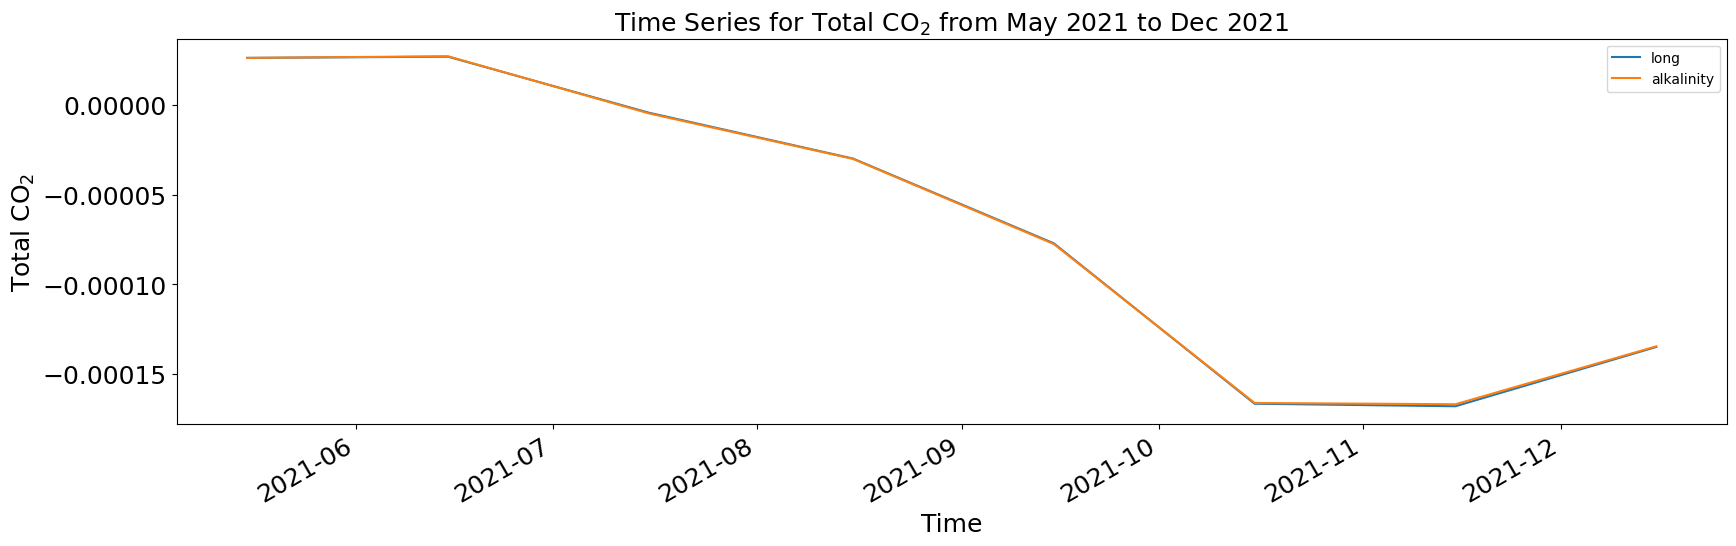

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
total_long = (long['CO2_flux'] * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1) / area.where(tmask.isel(deptht = 0)).sum(axis = 0).sum(axis = 0)
total_long.plot(ax= axs, label = "long")
total_alkalinity = (alkalinity['CO2_flux'] * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1) / area.where(tmask.isel(deptht = 0)).sum(axis = 0).sum(axis = 0)
total_alkalinity.plot(ax= axs, label = "alkalinity")
axs.legend()
axs.set_title(f'Time Series for Total CO$_2$ from May 2021 to Dec 2021', fontsize = 18)
axs.set_xlabel('Time', fontsize = 18)
axs.set_ylabel('Total CO$_2$', fontsize = 18)
axs.tick_params(axis='both', which='major', labelsize=18)

In [8]:
diff = alkalinity['CO2_flux'] - long['CO2_flux']

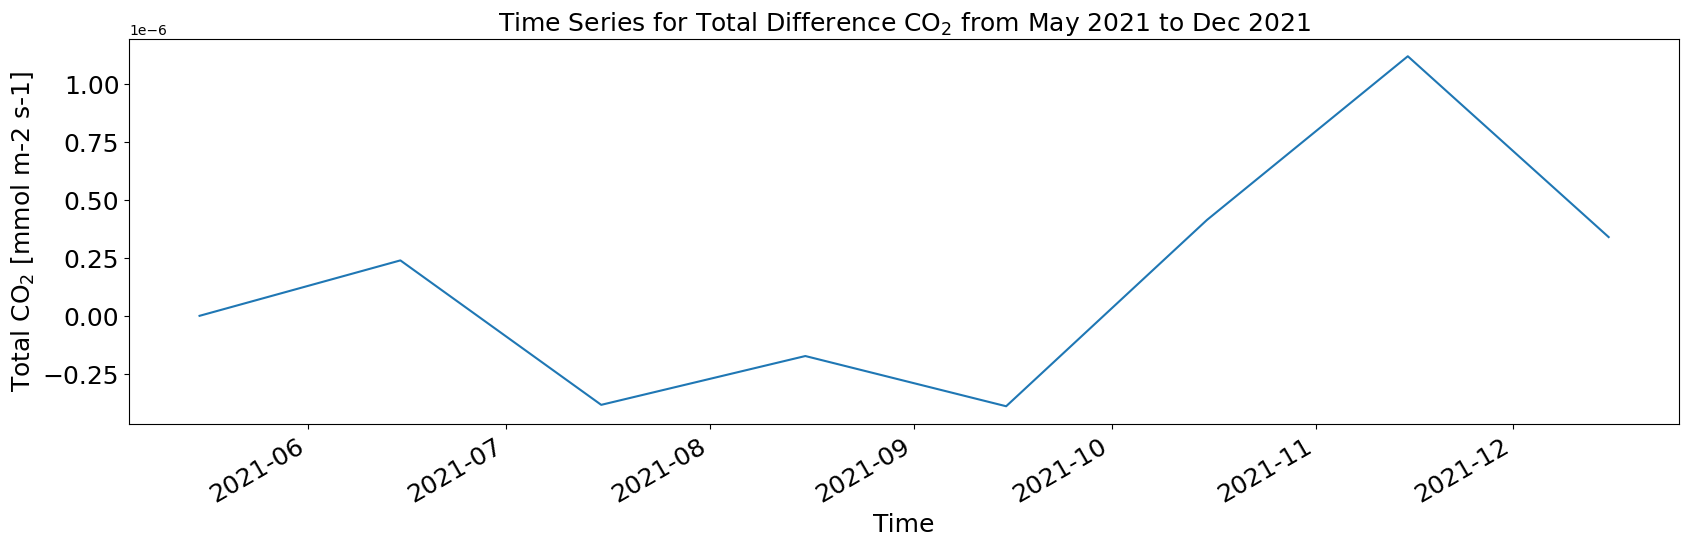

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
total_diff = (diff * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1)/ area.where(tmask.isel(deptht = 0)).sum(axis = 0).sum(axis = 0)
total_diff.plot()
axs.set_title(f'Time Series for Total Difference CO$_2$ from May 2021 to Dec 2021', fontsize = 18)
axs.set_xlabel('Time', fontsize = 18)
axs.set_ylabel('Total CO$_2$ [mmol m-2 s-1]', fontsize = 18)
axs.tick_params(axis='both', which='major', labelsize=18)

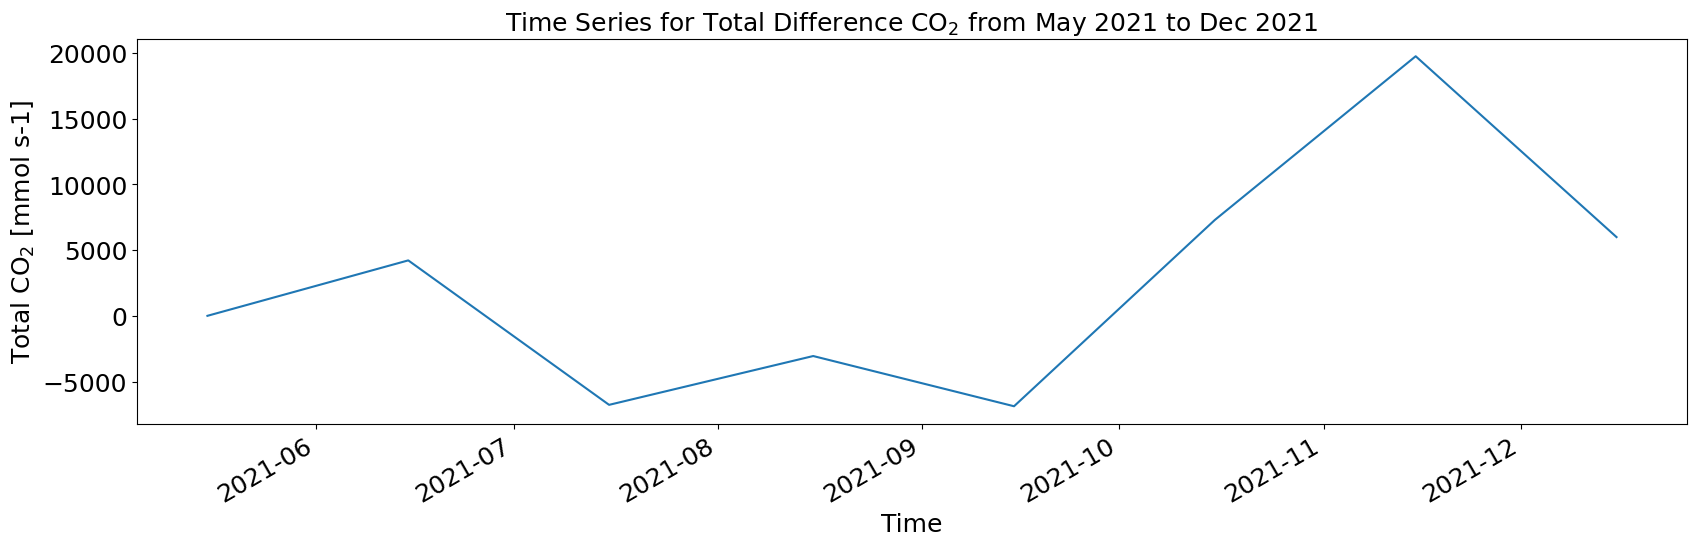

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
total_diff = (diff * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1)
total_diff.plot()
axs.set_title(f'Time Series for Total Difference CO$_2$ from May 2021 to Dec 2021', fontsize = 18)
axs.set_xlabel('Time', fontsize = 18)
axs.set_ylabel('Total CO$_2$ [mmol s-1]', fontsize = 18)
axs.tick_params(axis='both', which='major', labelsize=18)

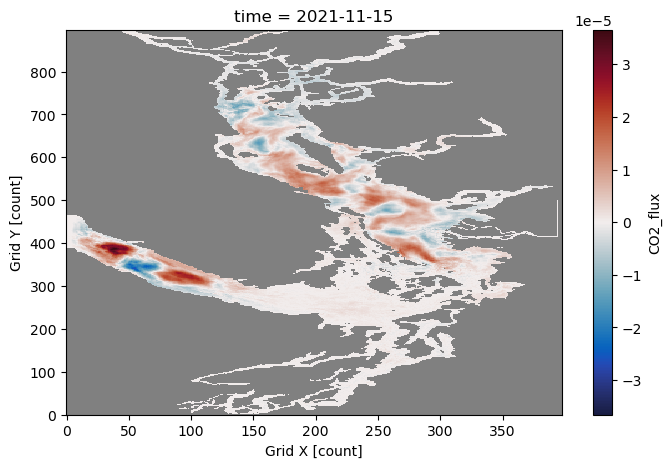

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
diff[6].where(tmask.isel(deptht = 0)).plot(ax = axs, cmap = cm_bwr)